## PU learning

In [22]:
from scipy import signal
from scipy import stats
from matplotlib import pyplot as plt
import numpy as np 
import pandas as pd

#### Data Creating

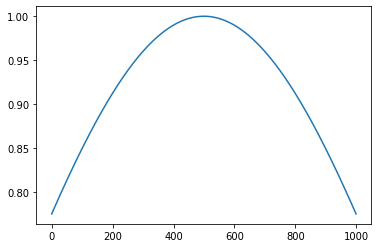

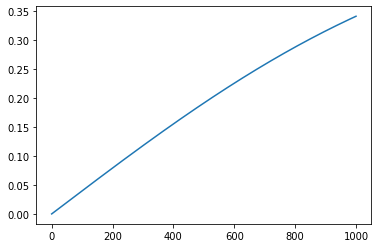

In [23]:
gaussian_arr = signal.gaussian(1000, std=700)
plt.plot(gaussian_arr)
plt.show()
laplaccian_arr = stats.norm.cdf(np.linspace(0,1,1001)) - 0.5
plt.plot(laplaccian_arr)
plt.show()

In [24]:
df = pd.DataFrame(data=np.vstack((np.stack(
    (gaussian_arr, [1]*len(gaussian_arr)), axis=-1),np.stack((laplaccian_arr, [0]*len(laplaccian_arr)), axis=-1))), 
    columns=["x", "y"]) #1 - for gaussian 0 - for laplaccian

In [25]:
df = df.sample(frac=1).reset_index(drop=True)

In [26]:
df.head()

,x,y
0,0.003590,0.0
1,0.025515,0.0
2,0.919654,1.0
3,0.829870,1.0
4,0.931602,1.0


In [27]:
import sklearn as sk
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df["x"], df["y"], test_size=0.33, random_state=42)

In [29]:
LG = LogisticRegression(solver='lbfgs') #random_state=0, ,multi_class='multinomial'
LG.fit(X_train.values.reshape(-1, 1), y_train)

C:\Users\nectostr\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [30]:
LG.predict(X_test.values.reshape(-1, 1))
round(LG.score(X_test.values.reshape(-1, 1),y_test), 4)

1.0

As shown on well diveded data usual classifiers works ok

In [31]:
df["s"] = df["y"] * np.random.randint(0,2,len(df))

In [32]:
df.head()

,x,y,s
0,0.003590,0.0,0.0
1,0.025515,0.0,0.0
2,0.919654,1.0,1.0
3,0.829870,1.0,1.0
4,0.931602,1.0,1.0


In [33]:
import sklearn as sk
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df["x"], df[["s","y"]], test_size=0.33, random_state=42)

In [34]:
LG = LogisticRegression(solver='lbfgs')#random_state=0, , multi_class='multinomial'
LG.fit(X_train.values.reshape(-1, 1), y_train["s"])

C:\Users\nectostr\AppData\Local\Continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [35]:
LG.predict(X_test.values.reshape(-1, 1))
print(f"Score for s is {LG.score(X_test.values.reshape(-1, 1),y_test['s']):.4f}, course unreal dependense is hard to learn")
print(f"Score for y is {LG.score(X_test.values.reshape(-1, 1),y_test['y']):.4f} course real dependense is hard to learn from unreal")

Score for s is 0.7670, course unreal dependense is hard to learn
Score for y is 0.7610 course real dependense is hard to learn from unreal


### Divide data

In [201]:
import sklearn as sk
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df["x"], df[["s", 'y']], test_size=0.33, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.33, random_state=42)

### Fit g classificator

In [53]:
LG_g = LogisticRegression(solver='lbfgs')#random_state=0, , multi_class='multinomial'
LG_g.fit(X_train.values.reshape(-1, 1), y_train["s"])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [51]:
d = LG_g.predict_proba(X_val.values.reshape(-1, 1))[:,1]
d1 = LG_g.predict(X_val.values.reshape(-1, 1))
r = np.stack((d,d1,d>0.5, d1 - d>0.5), axis=-1)
print(sum(r[:,-1]))

0.0


### Estimating c

In [71]:
X_val_p = X_val.loc[X_val.index[y_val["s"] == 1]]
d_p = LG_g.predict_proba(X_val_p.values.reshape(-1, 1))[:,1]
e1 = d_p.sum()/len(X_val)
e1

0.11444694184186976

In [72]:
d_v = LG_g.predict_proba(X_val.values.reshape(-1, 1))[:,1]
e2 = d_p.sum()/d_v.sum()
e2

0.44721758414685187

In [73]:
e3 = d_v.max()
e3

0.5884221059318024

### First way to create f

In [309]:
from sklearn.metrics import accuracy_score

In [310]:
LG_f = LogisticRegression(solver='lbfgs')
LG_f.fit(X_train.values.reshape(-1, 1), y_train["s"])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [311]:
test_r = np.array(LG_g.predict_proba(X_test.values.reshape(-1,1))[:,1]/e1 > 0.5, dtype=int)
accuracy_score(y_test["y"],test_r)

1.0

In [312]:
test_r = np.array(LG_g.predict_proba(X_test.values.reshape(-1,1))[:,1]/e2 > 0.5, dtype=int)
accuracy_score(y_test["y"],test_r)

1.0

In [313]:
test_r = np.array(LG_g.predict_proba(X_test.values.reshape(-1,1))[:,1]/e3 > 0.5, dtype=int)
accuracy_score(y_test["y"],test_r)

1.0

### Second way to improve f

In [301]:
LG_g = LogisticRegression(solver='lbfgs')#random_state=0, , multi_class='multinomial'
LG_g.fit(X_train.values.reshape(-1, 1), y_train["s"])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

#### e1

In [ ]:
# def create_new_train(e, X_train, y_train):
#     X_train_new = pd.DataFrame(X_train.loc[y_train.index[y_train["s"] == 1]])
#     X_train_new["w"] = 1
#     y_train_new = pd.DataFrame([1]*len(X_train_new), columns=["s"])
#     X_train_1 = pd.DataFrame(X_train.loc[y_train.index[y_train["s"] == 0]])
#     g_x = LG_g.predict_proba(X_train_1["x"].values.reshape(-1,1))[:,1]
#     X_train_1["w"] = (1-e1)/e1 * g_x/(1-g_x)
#     y_train_1 = pd.DataFrame([1]*len(X_train_1), columns=["s"])
#     X_train_2 = pd.DataFrame(X_train.loc[y_train.index[y_train["s"] == 0]])
#     g_x = LG_g.predict_proba(X_train_2["x"].values.reshape(-1,1))[:,1]
#     X_train_2["w"] = 1 - (1-e1)/e1 * g_x/ (1-g_x)
#     y_train_2 = pd.DataFrame([0]*len(X_train_2), columns=["s"])
#     X_train_new = X_train_new.append(X_train_1)
#     X_train_new = X_train_new.append(X_train_2)
#     y_train_new = y_train_new.append(y_train_1)
#     y_train_new = y_train_new.append(y_train_2)
#     return X_train_new, y_train_new

In [302]:
LG_f = LogisticRegression(solver='lbfgs')
X_train_new = pd.DataFrame(X_train.loc[y_train.index[y_train["s"] == 1]])
X_train_new["w"] = 1
y_train_new = pd.DataFrame([1]*len(X_train_new), columns=["s"])

In [303]:
X_train_1 = pd.DataFrame(X_train.loc[y_train.index[y_train["s"] == 0]])
g_x = LG_g.predict_proba(X_train_1["x"].values.reshape(-1,1))[:,1]
X_train_1["w"] = (1-e1)/e1 * g_x/(1-g_x)
y_train_1 = pd.DataFrame([1]*len(X_train_1), columns=["s"])

In [304]:
X_train_2 = pd.DataFrame(X_train.loc[y_train.index[y_train["s"] == 0]])
g_x = LG_g.predict_proba(X_train_2["x"].values.reshape(-1,1))[:,1]
X_train_2["w"] = 1 - (1-e1)/e1 * g_x/(1-g_x)
y_train_2 = pd.DataFrame([0]*len(X_train_2), columns=["s"])

In [305]:
X_train_new = X_train_new.append(X_train_1)
X_train_new = X_train_new.append(X_train_2)
y_train_new = y_train_new.append(y_train_1)
y_train_new = y_train_new.append(y_train_2)

In [314]:
LG_f.fit(X_train_new['x'].values.reshape(-1, 1), y_train_new["s"], sample_weight=X_train_new['w'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [315]:
LG_f.score(X_test.values.reshape(-1, 1),y_test['s'])

0.24962178517397882

#### e2

In [289]:
LG_f = LogisticRegression(solver='lbfgs')
X_train_new = pd.DataFrame(X_train.loc[y_train.index[y_train["s"] == 1]])
X_train_new["w"] = 1
y_train_new = pd.DataFrame([1]*len(X_train_new), columns=["s"])
X_train_1 = pd.DataFrame(X_train.loc[y_train.index[y_train["s"] == 0]])
g_x = LG_g.predict_proba(X_train_1["x"].values.reshape(-1,1))[:,1]
X_train_1["w"] = (1-e2)/e2 * g_x/(1-g_x)
y_train_1 = pd.DataFrame([1]*len(X_train_1), columns=["s"])
X_train_2 = pd.DataFrame(X_train.loc[y_train.index[y_train["s"] == 0]])
g_x = LG_g.predict_proba(X_train_2["x"].values.reshape(-1,1))[:,1]
X_train_2["w"] = 1 - (1-e2)/e2 * g_x/ (1-g_x)
y_train_2 = pd.DataFrame([0]*len(X_train_2), columns=["s"])
X_train_new = X_train_new.append(X_train_1)
X_train_new = X_train_new.append(X_train_2)
y_train_new = y_train_new.append(y_train_1)
y_train_new = y_train_new.append(y_train_2)

In [290]:
LG_f.fit(X_train_new['x'].values.reshape(-1, 1), y_train_new["s"], X_train_new['w'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [291]:
LG_f.score(X_test.values.reshape(-1, 1),y_test['s'])

0.6777609682299546

#### e3

In [292]:
LG_f = LogisticRegression(solver='lbfgs')
X_train_new = pd.DataFrame(X_train.loc[y_train.index[y_train["s"] == 1]])
X_train_new["w"] = 1
y_train_new = pd.DataFrame([1]*len(X_train_new), columns=["s"])
X_train_1 = pd.DataFrame(X_train.loc[y_train.index[y_train["s"] == 0]])
g_x = LG_g.predict_proba(X_train_1["x"].values.reshape(-1,1))[:,1]
X_train_1["w"] = (1-e3)/e3 * g_x/(1-g_x)
y_train_1 = pd.DataFrame([1]*len(X_train_1), columns=["s"])
X_train_2 = pd.DataFrame(X_train.loc[y_train.index[y_train["s"] == 0]])
g_x = LG_g.predict_proba(X_train_2["x"].values.reshape(-1,1))[:,1]
X_train_2["w"] = 1 - (1-e3)/e3 * g_x/ (1-g_x)
y_train_2 = pd.DataFrame([0]*len(X_train_2), columns=["s"])
X_train_new = X_train_new.append(X_train_1)
X_train_new = X_train_new.append(X_train_2)
y_train_new = y_train_new.append(y_train_1)
y_train_new = y_train_new.append(y_train_2)

In [293]:
LG_f.fit(X_train_new['x'].values.reshape(-1, 1), y_train_new["s"], X_train_new['w'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [294]:
LG_f.score(X_test.values.reshape(-1, 1),y_test['s'])

0.7579425113464447